## 影像圖片分類深度學習模型 - CNN圖片分類模型訓練與預測

Ref: https://gist.github.com/korakot/8409b3feec20f159d8a50b0a811d3bca


In [3]:
# 匯入模組
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('default') # 設定主題配色

import keras
from keras.preprocessing.image import load_img # 載入img
from keras.preprocessing.image import img_to_array # img轉矩陣
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout

#Conv2D 卷積層, MaxPooling2D 池化層, Flatten 平坦層
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras import backend as K
from keras import models

# 以下為 TensorFlow 1.x 用法
# from keras.utils import to_categorical  # # One-Hot Encoding
# from tensorflow.keras.utils import plot_model  # 繪製模型圖

# 以下為 TensorFlow 2.x 用法
from tensorflow.python.keras.utils.np_utils import to_categorical  # # One-Hot Encoding
from tensorflow.python.keras.utils.vis_utils import plot_model  # 繪製模型圖

from keras.models import load_model

## 取得滑鼠寫的文字並存檔

In [4]:
from IPython.display import HTML, Image
from google.colab.output import eval_js
from base64 import b64decode

canvas_html = """
<canvas width=%d height=%d></canvas>
<button>Finish</button>
<script>
var canvas = document.querySelector('canvas')
var ctx = canvas.getContext('2d')
ctx.lineWidth = %d
var button = document.querySelector('button')
var mouse = {x: 0, y: 0}
canvas.addEventListener('mousemove', function(e) {
  mouse.x = e.pageX - this.offsetLeft
  mouse.y = e.pageY - this.offsetTop
})
canvas.onmousedown = ()=>{
  ctx.beginPath()
  ctx.moveTo(mouse.x, mouse.y)
  canvas.addEventListener('mousemove', onPaint)
}
canvas.onmouseup = ()=>{
  canvas.removeEventListener('mousemove', onPaint)
}
var onPaint = ()=>{
  ctx.lineTo(mouse.x, mouse.y)
  ctx.stroke()
}
var data = new Promise(resolve=>{
  button.onclick = ()=>{
    resolve(canvas.toDataURL('image/png'))
  }
})
</script>
"""

def draw(filename='drawing.png', w=400, h=200, line_width=1):
  display(HTML(canvas_html % (w, h, line_width)))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return len(binary)

In [ ]:
!git clone https://gist.github.com/8409b3feec20f159d8a50b0a811d3bca.git

%run /content/8409b3feec20f159d8a50b0a811d3bca/draw.py

Cloning into '8409b3feec20f159d8a50b0a811d3bca'...
remote: Enumerating objects: 6, done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 6
Receiving objects: 100% (6/6), done.
Resolving deltas: 100% (1/1), done.


In [5]:
filename_predict = 'hand_write.png'

print('用滑鼠寫字，完成後按 Finish')
draw(filename = filename_predict, w=200, h=200, line_width=15)

用滑鼠寫字，完成後按 Finish


3450

In [6]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import cv2

(200, 200, 4)
(200, 200, 3)
(200, 200)


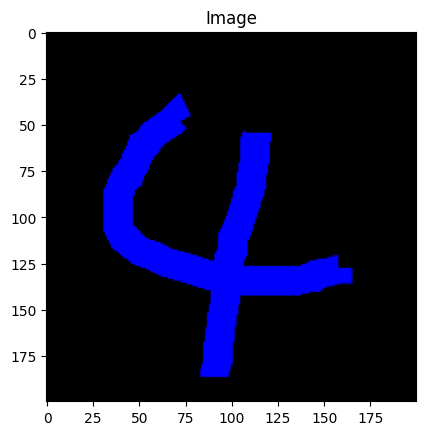

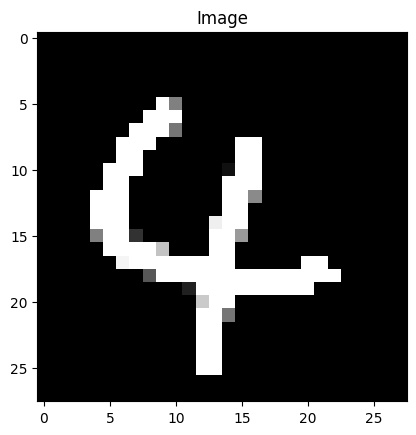

In [7]:
# 指定圖檔名
filename = filename_predict

# 讀入圖像並顯示
img = cv2.imread(filename_predict, -1)
print(img.shape)

img = img[:,:,1:]  # png 4 bytes to jpg 3bytes
print(img.shape)

# if len(img.shape) > 2 and img.shape[2] == 4:
#     #convert the image from RGBA2RGB
#     # img = cv2.cvtColor(img, cv2.COLOR_BGRA2BGR)
#     #slice off the alpha channel
#     img = img[:, :, :3]


gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # 轉為灰階格式

print(gray.shape)
plt.imshow(img, cmap='gray'), plt.title('Image')
plt.show()

image = cv2.resize(gray, (28,28))

plt.imshow(image, cmap='gray'), plt.title('Image')
plt.show()


In [8]:
# image = cv2.imread(filename_predict, cv2.IMREAD_GRAYSCALE)
# image = cv2.resize(image, (28, 28))
# print(image.shape)

image = image.astype('float32')
image = image.reshape(1, 28, 28, 1)
# image = 255-image
image /= 255

print(image.shape)


(1, 28, 28, 1)


In [9]:
# 上傳一個檔案
from google.colab import files
uploaded = files.upload()

In [10]:
# 載入模型
model = load_model('my_mnist.keras')

model.summary()

Model: "CNN-mnist"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv-1 (Conv2D)             (None, 24, 24, 24)        624       
                                                                 
 Pooling-1 (MaxPooling2D)    (None, 12, 12, 24)        0         
                                                                 
 Conv-2 (Conv2D)             (None, 8, 8, 48)          28848     
                                                                 
 Pooling-2 (MaxPooling2D)    (None, 4, 4, 48)          0         
                                                                 
 flatten_1 (Flatten)         (None, 768)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               196864    
                                                                 
 dense_3 (Dense)             (None, 10)                25

In [11]:
# 預測分類

prediction_prob = model.predict(image)
prediction = prediction_prob.argmax(axis = -1)
print(prediction)


1/1 [==============================] - 2s 2s/step
[4]
